<IPython.core.display.Math object>

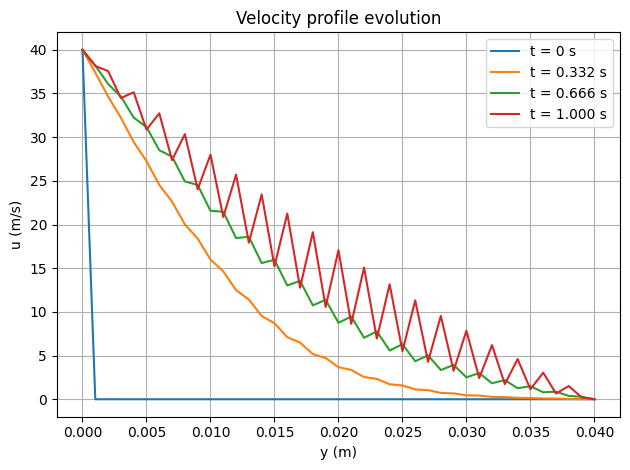

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
u0 = 40.0            # Velocity at y=0 (m/s)
nu = 0.000217        # Kinematic viscosity (m^2/s)
h = 0.04             # Height of the channel (m)
dy = 0.001           # Grid spacing (m)

# Time step (for sigma = 0.434)
#dt1 = 0.00100  #for sigma=0.217  
dt1 =   0.00232  #Optional second time step (not used in current simulation)
sigma1 = nu * dt1 / dy**2
from IPython.display import display, Math
display(Math(r'\sigma = {:.4f}'.format(sigma1)))


 

# Grid
y = np.arange(0, h + dy, dy)
num_y = len(y)

# Initial condition
u_initial = np.zeros(num_y)
u_initial[0] = u0

# Time stepping for case 1
total_time1 = 1.0
num_steps1 = int(total_time1 / dt1)
u1 = np.zeros((num_steps1, num_y))
u1[0, :] = u_initial

# Explicit Euler time stepping
for n in range(1, num_steps1):
    for j in range(1, num_y - 1):
        u1[n, j] = u1[n - 1, j] + sigma1 * (u1[n - 1, j + 1] - 2 * u1[n - 1, j] + u1[n - 1, j - 1])
    u1[n, 0] = u0
    u1[n, -1] = 0

# Optional: Plot final profile
plt.plot(y, u1[0], label="t = 0 s")
plt.plot(y, u1[num_steps1 // 3], label=f"t = {dt1 * (num_steps1 // 3):.3f} s")
plt.plot(y, u1[2 * num_steps1 // 3], label=f"t = {dt1 * (2 * num_steps1 // 3):.3f} s")
plt.plot(y, u1[-1], label=f"t = {total_time1:.3f} s")
plt.xlabel("y (m)")
plt.ylabel("u (m/s)")
plt.title("Velocity profile evolution")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
